In [3]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'dataset/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [5]:
# print the first five data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
import warnings
warnings.filterwarnings('ignore')
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# make class predication for the testing set
y_pred_class = logreg.predict(X_test)

Classification accuracy: percentage of correct predictions

In [12]:
# calculation accuracy 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [13]:
# examise the class distribution of the testing set (using a Pandas Series Method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [14]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [16]:
y_pred_class.mean()

0.140625

In [17]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [18]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [19]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts() / len(y_test)

0    0.677083
1    0.322917
Name: label, dtype: float64

In [20]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

Comparing the true and predicted response values

In [21]:
# print the first 25 true and predicted response
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Conclusion:
            . Classification accuracy is the easiest classification metric to understand 
            . But, it does not tell you the underlying distribution of response values
            . And, it does not tell you what "types" of errors your classifier is making

# Confusion matrix

Table that describes the performance of a classification model

In [22]:
# Important: first argument is true values, second argumnet is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


        . Every observation in the testing set is represented in exactly one box. 
        . It's a 2x2 matrix because there are 2 response classes.
        . The format shown here is not universal.

Basic terminology:
    
        . True Positives (TP): we correctly predicted that they do have diabetes
        . True Negatives (TN): we correctly predicted that they don't have diabetes
        . False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
        . False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [23]:
# print the first 25 true and predicated response
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [25]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


Classification Error: Overall, how often is the classifier incorrect?
    
Also known as "Misclassification Rate"

In [26]:
print((FP + FN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.6927083333333334


Sensitivity: When the actual value is positive, how often is the prediction correct?
    
        . How "sensitive" is the classifier to detecting positive instances?
        . Also known as "True Positive Rate" or "Recall"

In [27]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


Specificity: When the actual value is negative, how often is the prediction correct?
    
          .How "specific" (or "selective") is the classifier in predicting positive instances?

In [31]:
print(TN / float(TN + FP))

0.9076923076923077


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [32]:
print(FP / float(TN + FP))

0.09230769230769231


Precision: When a positive value is predicted, how often is the prediction correct?
    
       . How "precise" is the classifier when predicting positive instances?

In [34]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


In [ ]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

Conclusion:
    
        . Confusion matrix gives you a more complete picture of how your classifier is performing.
        . Also allows you to compute various classification metrics, and these metrics can guide your model selection.
        
Which metrics should you focus on?

        . Choice of metric depends on your business objective.
        . Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives 
          (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter).
        . Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives
          (normal transactions that are flagged as possible fraud) are more acceptable than false negatives
          (fraudulent transactions that are not detected).

Adjusting the classification threshold


In [35]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [38]:
# print the first 10 predicated probabilites of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [39]:
# print the first 10 predicated probabilites for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [42]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [43]:
# allow plots to appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt


Text(0, 0.5, 'Frequency')

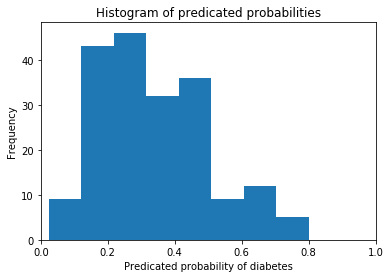

In [44]:
# histogram of predicated probabilites 
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicated probabilities')
plt.xlabel('Predicated probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [45]:
# predicate diabetes if the predicated probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]


In [46]:
# print the first 10 predicated probabilites 
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [47]:
# print the first 10 predicated class with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [49]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [50]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [51]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [52]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


Conclusion:
        . Threshold of 0.5 is used by default (for binary problems) to convert 
          predicted probabilities into class predictions.
        . Threshold can be adjusted to increase sensitivity or specificity.
        . Sensitivity and specificity have an inverse relationship.

   ROC Curves and Area Under the Curve (AUC)

Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by
          various thresholds, without actually changing the threshold?
        
Answer: Plot the ROC curve!

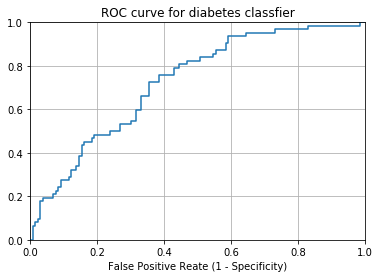

In [53]:
# Important : first argument is true values, second argument is predicated probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classfier')
plt.xlabel('False Positive Reate (1 - Specificity)')
plt.grid(True)

. ROC curve can help you to choose a threshold that balances sensitivity and specificity
  in a way that makes sense for your particular context.
. You can't actually see the thresholds used to generate the curve on the ROC curve itself.

In [63]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [64]:
evaluate_threshold(0.5) 

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [65]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC is the percentage of the ROC plot that is underneath the curve:

In [67]:
# Important: first argument is true  values, second argument is predicated probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


. AUC is useful as a single number summary of classifier performance.
. If you randomly chose one positive and one negative observation, AUC represents the likelihood 
  that your classifier will assign a higher predicted probability to the positive observation.
. AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [69]:
import warnings
warnings.filterwarnings('ignore')
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618

Confusion matrix advantages:
        . Allows you to calculate a variety of metrics 
        . Useful for multi-class problems (more than two response classes)
        
ROC/AUC advantages:
        . Does not require you to set a classification threshold 
        . Still useful when there is high class imbalance